# Week 5 handin

## 01 Assignment

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots


## 02 Status
Completed all EX1 tasks

## Exercise 1

# Setup Exercise 1-7

In [71]:
import pandas as pd

exercise8 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2020K3', sep=';')
exercise9 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=U%2CTOT&OMR%C3%85DE=101%2C851%2C751%2C561%2C461&Tid=2020K3", sep = ";")
exercise10 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=U%2CG%2CE%2CF&OMR%C3%85DE=101&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1", sep = ";")
exercise11 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=U%2CG&OMR%C3%85DE=000&ALDER=*", sep = ";")


print(exercise8)
print(exercise9)
print(exercise10)
print(exercise11)


  CIVILSTAND     TID  INDHOLD
0   Divorced  2008Q1   428864
1   Divorced  2020Q3   550715
  CIVILSTAND         OMRÅDE            TID  INDHOLD
0    U Ugift  101 København  2020K3 2020K3   414218
1    U Ugift    851 Aalborg  2020K3 2020K3   118694
2    U Ugift     751 Aarhus  2020K3 2020K3   208470
3    U Ugift    561 Esbjerg  2020K3 2020K3    55330
4    U Ugift     461 Odense  2020K3 2020K3   112672
5  TOT I alt  101 København  2020K3 2020K3   633035
6  TOT I alt    851 Aalborg  2020K3 2020K3   217316
7  TOT I alt     751 Aarhus  2020K3 2020K3   349433
8  TOT I alt    561 Esbjerg  2020K3 2020K3   115650
9  TOT I alt     461 Odense  2020K3 2020K3   204718
          CIVILSTAND         OMRÅDE            TID  INDHOLD
0            U Ugift  101 København  2008K1 2008K1   309661
1            U Ugift  101 København  2009K1 2009K1   317126
2            U Ugift  101 København  2010K1 2010K1   325562
3            U Ugift  101 København  2011K1 2011K1   335339
4            U Ugift  101 København  2

## Exercise 8
8. What is the change in pct of divorced danes from 2008 to 2020?

In [15]:
div2020 = exercise8.iloc[1][2]
div2008 = exercise8.iloc[0][2]
print(((div2020-div2008)/div2008)*100)

28.412503730786447


## Exercise 9
9. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [46]:

ugift = exercise9.loc[exercise9['CIVILSTAND']=="U Ugift"]
pop_total = exercise9.loc[exercise9['CIVILSTAND']=="TOT I alt"]


never_married = {}
for idx in range(len(pop_total)):
    pert = (ugift.iloc[idx]["INDHOLD"]/pop_total.iloc[idx]["INDHOLD"])*100
    never_married[(pop_total.iloc[idx]["OMRÅDE"])[4:]] = pert

percentage = sorted(never_married.values(), reverse=True)
area = sorted(never_married, key=never_married.get, reverse=True)

print("Area with higest ´never married´ is", area[0],percentage[0],"%")


Area with higest ´never married´ is København 65.43366480526353 %


HEJ THOMAS


## Exercise 10
10. Show a bar chart of changes in marital status in Copenhagen from 2008 till now

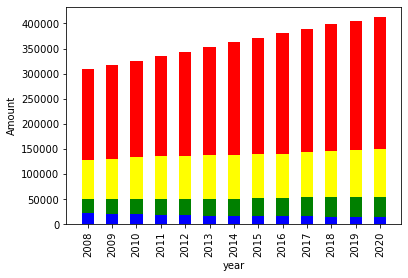

In [69]:
import matplotlib.pyplot as plt

years = set(exercise10['TID'].tolist())
years = sorted(years)
years = [i[:4] for i in years]

ugift = exercise10.loc[exercise10['CIVILSTAND']=="U Ugift"]["INDHOLD"]
gift_sep = exercise10.loc[exercise10['CIVILSTAND']=="G Gift/separeret"]["INDHOLD"]
enker = exercise10.loc[exercise10['CIVILSTAND']=="E Enke/enkemand"]["INDHOLD"]
fraskilt = exercise10.loc[exercise10['CIVILSTAND']=="F Fraskilt"]["INDHOLD"]

plt.xlabel("year", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.xticks(rotation=90)

p1 = plt.bar(years, ugift, width=0.5, linewidth=0, align='center', color='red')
p2 = plt.bar(years, gift_sep, width=0.5, linewidth=0, align='center', color='yellow') 
p3 = plt.bar(years, fraskilt, width=0.5, linewidth=0, align='center', color='green')
p4 = plt.bar(years, enker, width=0.5, linewidth=0, align='center', color='blue') 

# Exercise 11
11. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

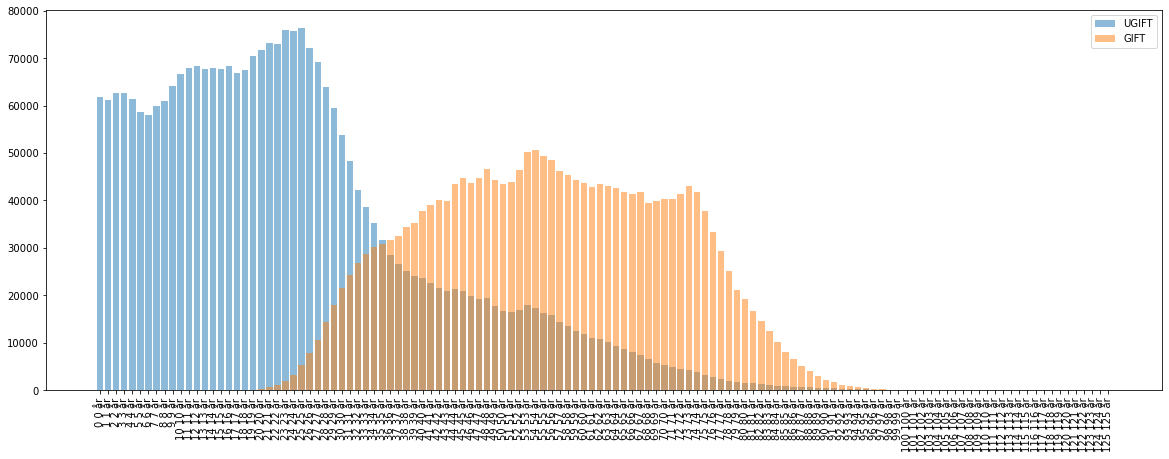

In [127]:
import matplotlib.pyplot as plt

ugift = exercise11.loc[exercise11['CIVILSTAND']=="U Ugift"]
gift = exercise11.loc[exercise11['CIVILSTAND']=="G Gift/separeret"]

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)

plt.bar(ugift[1:]["ALDER"], ugift[1:]["INDHOLD"], label="UGIFT", alpha=0.5)
plt.bar(gift[1:]["ALDER"], gift[1:]["INDHOLD"], label="GIFT", alpha=0.5)
plt.legend(loc=1)


